In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import scipy.stats as st
import random

In [2]:
cur_dir = os.path.dirname('__file__')

train = pd.read_csv(os.path.join(cur_dir, "data", "train.csv"))
test = pd.read_csv(os.path.join(cur_dir, "data", "test.csv"))

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
def preprocess(df):
    
    res = df.copy()
    x75, x25 = np.percentile(res.X, [75 ,25])
    xiqr = x75 - x25
    y75, y25 = np.percentile(res.Y, [75 ,25])
    yiqr = x75 - x25
    res = res[res.X < x75 + 3*xiqr]
    res = res[res.Y < y75 + 3*xiqr]
    
    res = res[res.X > x25 - 3*xiqr]
    res = res[res.Y > y25 - 3*xiqr]
    
    return res

def get_random_subset(df, n):
    sub = random.sample(xrange(len(df)), n)
    return df.iloc[sub]

In [5]:
train = preprocess(train)

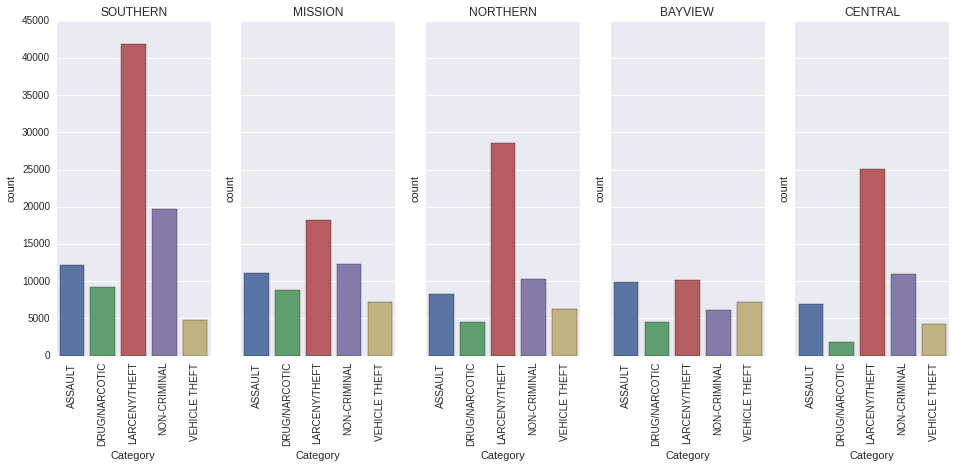

In [6]:
most_common_cats = train.Category[train.Category != "OTHER OFFENSES"].value_counts().index[0:5]
most_common_districts = train.PdDistrict.value_counts().index[0:5]


f, axtuple = plt.subplots(1, len(most_common_cats), sharey=True)

for i in range(len(most_common_districts)):
    
    subset = train[(train.PdDistrict == most_common_districts[i]) & train.Category.isin(most_common_cats)]
    
    ax = sns.countplot(x="Category", data=subset.sort_values("Category"), ax=axtuple[i])
    ax.set_title(most_common_districts[i])
    plt.sca(ax)
    plt.xticks(rotation=90)
    
plt.gcf().set_size_inches(16, 6, forward=True)


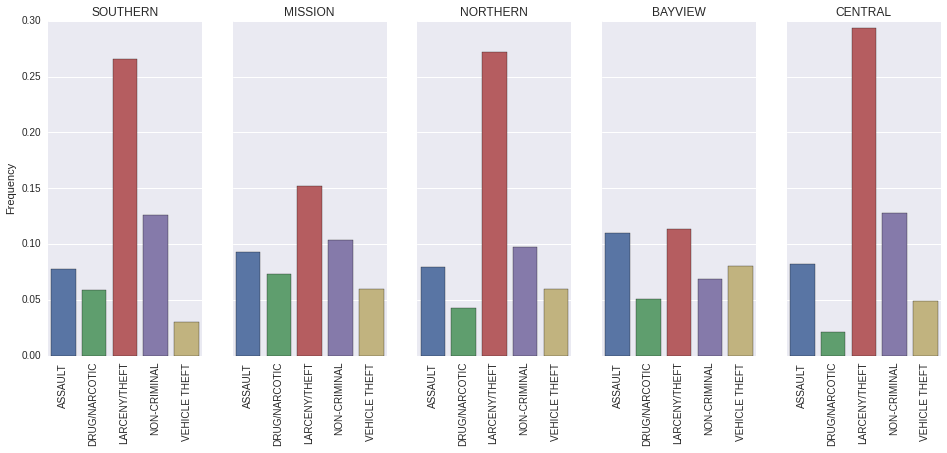

In [7]:
most_common_cats = train.Category[train.Category != "OTHER OFFENSES"].value_counts().index[0:5]
most_common_districts = train.PdDistrict.value_counts().index[0:5]


f, axtuple = plt.subplots(1, len(most_common_cats), sharey=True)


for i in range(len(most_common_districts)):
    
    subset = train[train.PdDistrict == most_common_districts[i]]
    proportions = (subset.Category.value_counts().astype(float) / len(subset)).loc[most_common_cats]
    proportions = proportions.sort_index()
    
    
    
    ax = sns.barplot(x=proportions.index, y=proportions, ax=axtuple[i])
    ax.set_title(most_common_districts[i])
    ax.set_ylabel("")
    plt.sca(ax)
    plt.xticks(rotation=90)
    
axtuple[0].set_ylabel("Frequency")
plt.gcf().set_size_inches(16, 6, forward=True)


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


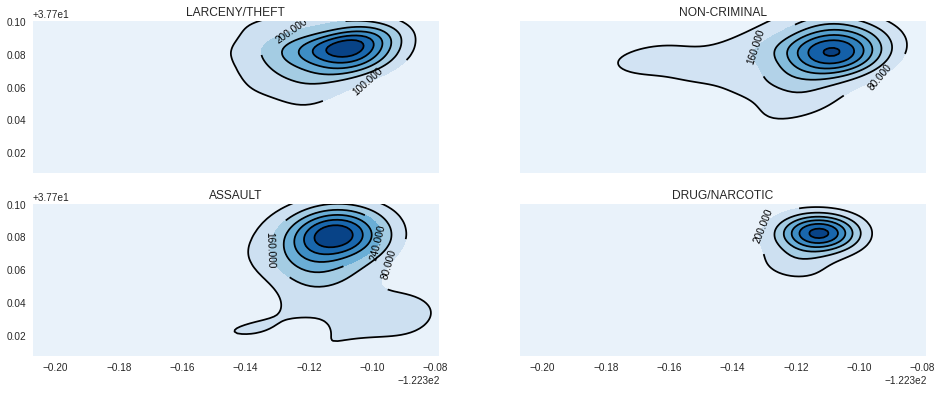

In [8]:
train_subset = get_random_subset(train, 5000)

cats = [['LARCENY/THEFT', 'NON-CRIMINAL'], ['ASSAULT', 'DRUG/NARCOTIC']]

f, axtuple = plt.subplots(2, 2, sharey=True, sharex=True)

rows, cols = axtuple.shape

for j in range(rows):
    
    for i in range(cols):

        subset = train_subset[train_subset.Category == cats[j][i]]

        x = subset.X
        y = subset.Y

        # plt.scatter(x, y)

        xmin, xmax = x.min(), x.max()
        ymin, ymax = y.min(), y.max()

        # # Peform the kernel density estimate
        xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([xx.ravel(), yy.ravel()])
        values = np.vstack([x, y])
        kernel = st.gaussian_kde(values)
        f = np.reshape(kernel(positions).T, xx.shape)

    #     fig = plt.figure()
        ax = axtuple[j, i]
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        ax.set_title(cats[j][i])
        cfset = ax.contourf(xx, yy, f, cmap='Blues')
        cset = ax.contour(xx, yy, f, colors='k')
        ax.clabel(cset, inline=1, fontsize=10)
    

plt.gcf().set_size_inches(16, 6, forward=True)
    
# axtuple[0].set_ylabel("Frequency")
# plt.gcf().set_size_inches(16, 6, forward=True)